In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# read the data

In [209]:
df=pd.read_csv("heat.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145,233,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160,286,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120,229,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130,250,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130,204,0,2,172.0,0,1.4,1,0,3,0


# data cleaning

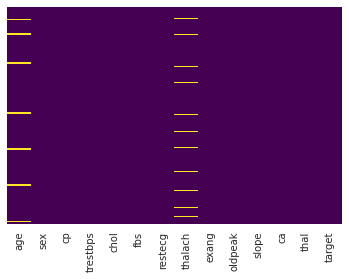

In [210]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

# check the percetile of missing data

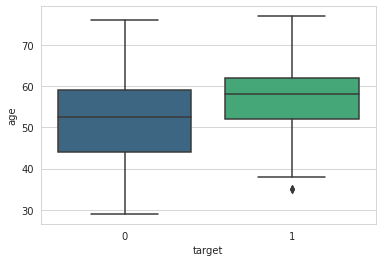

In [211]:
sns.boxplot(x='target',y='age',data=df,palette='viridis')
plt.show()

In [212]:
def inputs_age(cols):
    age=cols[0]
    target=cols[1]
    if(pd.isnull(age)):
        if(target==0):
            return 53
        else:
            return 58
    else:
        return age
df['age']=df[['age','target']].apply(inputs_age,axis=1)

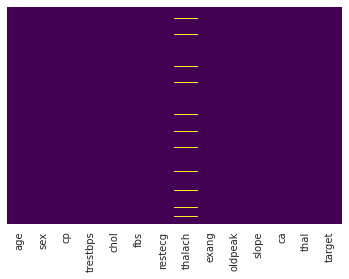

In [213]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [214]:
import math
mean_age=math.floor(df.thalach.mean())
df.thalach=df.thalach.fillna(mean_age)

# now data is clean

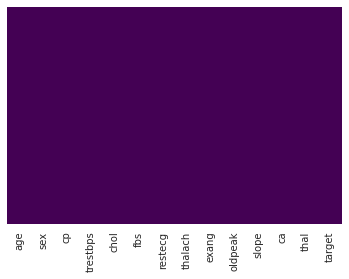

In [215]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

# feature selection

In [216]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.099317,0.101720,0.283908,0.218754,0.091676,0.152600,-0.389691,0.089434,0.198370,0.157996,0.086630,0.017722,0.224628
sex,-0.099317,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.053571,0.146201,0.102173,0.037533,-0.079361,0.031518,0.276816
cp,0.101720,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.319002,0.384060,0.202277,0.152050,0.019134,-0.028985,0.414446
trestbps,0.283908,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.036907,0.064762,0.189171,0.117382,-0.010263,0.017149,0.150825
chol,0.218754,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,0.000978,0.061310,0.046564,-0.004062,0.068128,0.057866,0.085164
fbs,0.091676,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,0.000944,0.025665,0.005747,0.059894,-0.032997,-0.080552,0.025264
restecg,0.152600,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.065253,0.084867,0.114133,0.133946,0.057077,-0.000807,0.169202
thalach,-0.389691,-0.053571,-0.319002,-0.036907,0.000978,0.000944,-0.065253,1.000000,-0.367016,-0.331555,-0.370000,-0.038592,0.051575,-0.406985
exang,0.089434,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.367016,1.000000,0.288223,0.257748,0.018935,-0.030035,0.431894
oldpeak,0.198370,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.331555,0.288223,1.000000,0.577537,0.091285,0.038027,0.424510


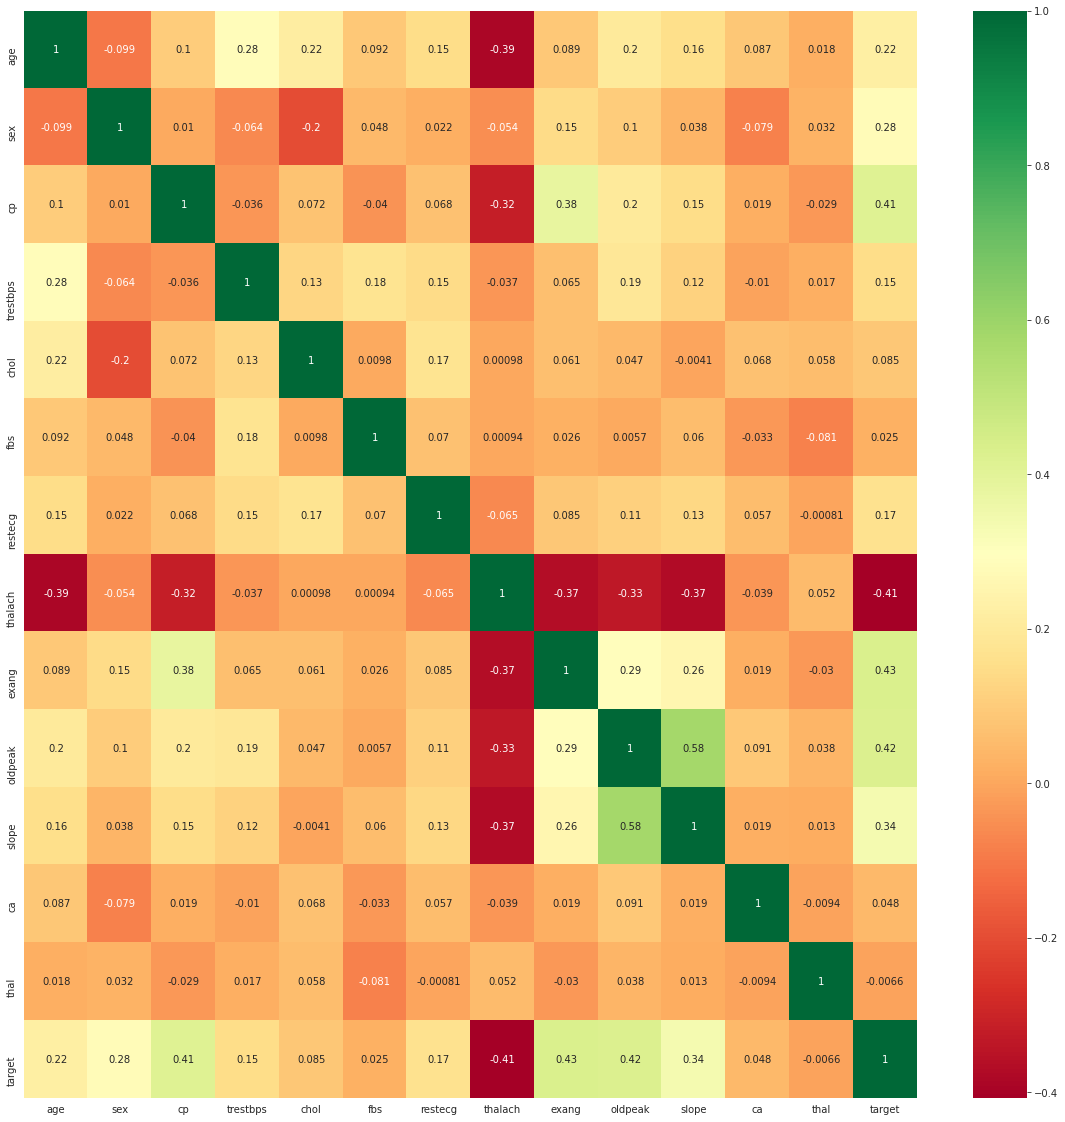

In [217]:
corrfeat=df.corr()
top_corr_feat=corrfeat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_feat].corr(),annot=True,cmap='RdYlGn')


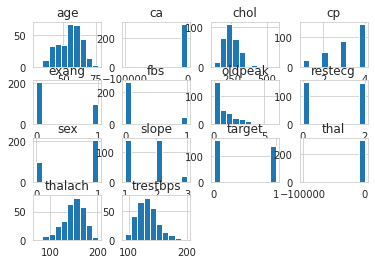

In [218]:
a=df.hist()

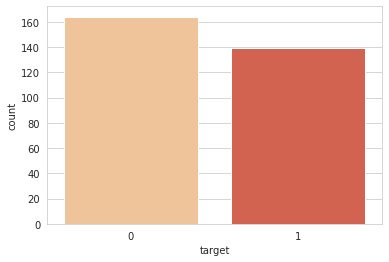

In [219]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='OrRd')

# preprocessing 

In [220]:
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [221]:
from sklearn.preprocessing import StandardScaler 
standsclar=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach']
dataset[columns_to_scale]=standsclar.fit_transform(dataset[columns_to_scale])

In [222]:
y=dataset['target']
x=dataset.drop(['target'],axis=1)
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_3,ca_-100000,ca_0,ca_1,ca_2,ca_3,thal_-100000,thal_3,thal_6,thal_7
0,0.958290,0.757525,-0.264900,0.011151,2.3,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1,1.406034,1.611220,0.760415,-1.856117,1.5,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1.406034,-0.665300,-0.342283,-0.922483,2.6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,-1.952045,-0.096170,0.063974,1.656126,3.5,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,-1.504301,-0.096170,-0.825922,0.989244,1.4,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.056557,-1.234430,0.334813,-0.789106,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
299,0.398610,0.700612,-1.038723,-0.388978,3.4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
300,0.398610,-0.096170,-2.238149,-1.544905,1.2,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.286674,-0.096170,-0.206864,1.078162,0.0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [223]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

# LogisticRegression

In [224]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(random_state=0,max_iter=1000)
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [225]:
y_pred = reg.predict(x_test)

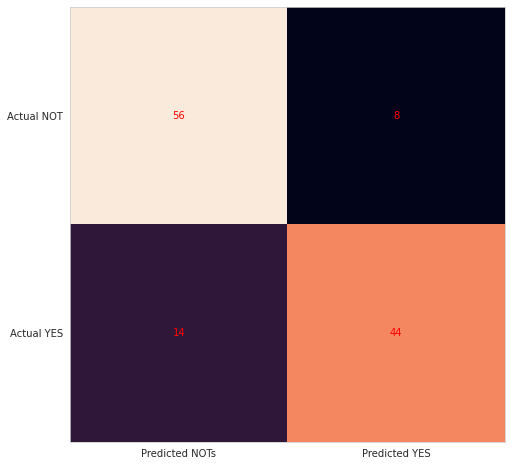

In [226]:
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NOTs', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NOT', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [227]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.819672131147541


# KNeighborsClassifier

In [228]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())
err_scores=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    err_scores.append(1-score.mean())

# Finding the best value for k

Text(0.5, 1.0, 'K Neighbors Classifier scores for different k values')

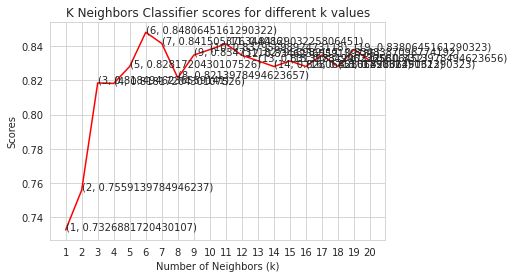

In [229]:
plt.plot([k for k in range(1,21)],knn_scores,color='red')
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel("Number of Neighbors (k)")
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different k values')

Text(0.5, 1.0, 'K Neighbors Classifier scores for different k values')

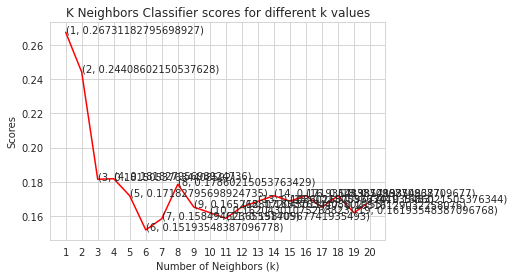

In [230]:
plt.plot([k for k in range(1,21)],err_scores,color='red')
for i in range(1,21):
    plt.text(i,err_scores[i-1],(i,err_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel("Number of Neighbors (k)")
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different k values')

In [231]:
knn_classifier=KNeighborsClassifier(n_neighbors=6)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [232]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=6,weights='distance')
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

# Prediction

In [233]:
y_pred = classifier.predict(x_test)

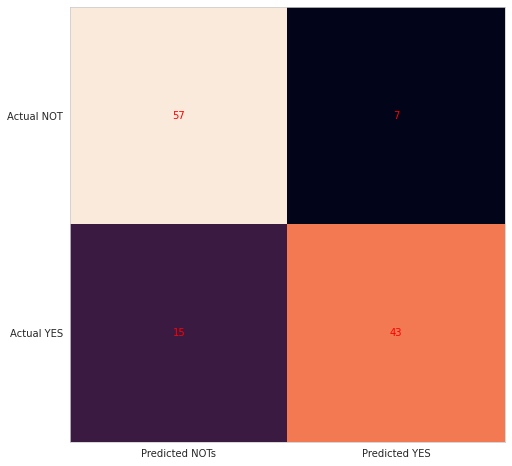

In [234]:
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NOTs', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NOT', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [235]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.819672131147541


# RandomForestClassifier

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [237]:
random_class=RandomForestClassifier(n_estimators=10)
random_class=random_class.fit(x_train,y_train)
y_pred=random_class.predict(x_test)

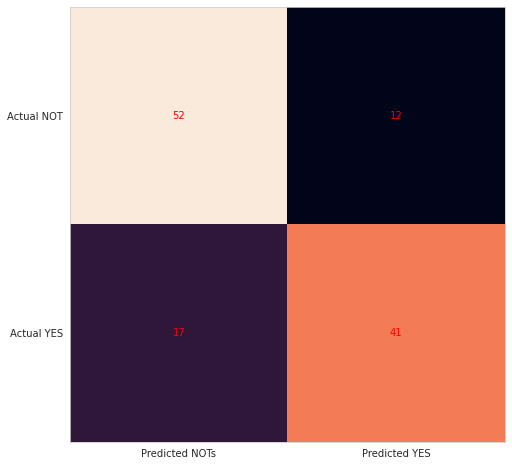

In [238]:
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NOTs', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NOT', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [239]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7622950819672131


# DecisionTreeClassifier

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [241]:
des_class=DecisionTreeClassifier()
des_class = des_class.fit(x_train,y_train)
y_pred = des_class.predict(x_test)

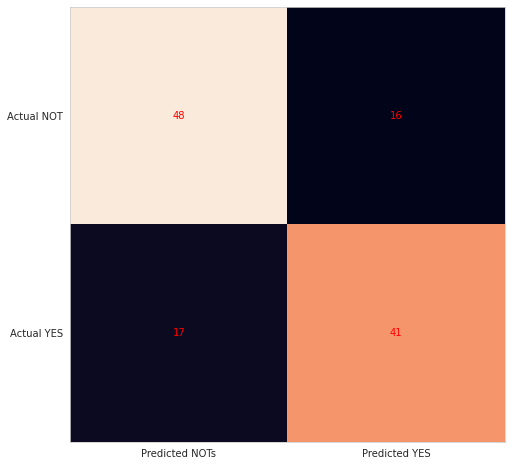

In [242]:
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NOTs', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NOT', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [243]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7295081967213115
